<h1><center>EDA for Algerian Forest Fire Dataset</center></h1>

## Dataset Information

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.

### Attribute Information

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8 FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire.

### Importing the libraries

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Load the dataset

In [387]:
# Loading the dataset and make the 1st row as header 

# Because it has the information about two regions : 
#   Bejaia region located in the northeast of Algeria
#   Sidi Bel-abbes region located in the northwest of Algeria

dataset = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

### Displaying Top 5 Records

In [388]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [389]:
# By differentiating both regions data 

# Here we are adding Region Feature with longer their names

dataset['Region'] = 'Bejaia'
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia


In [390]:
dataset.loc[122:,'Region'] = 'Sidi Bel-abbes'  # From 122nd row to end record has second region information.
dataset.iloc[122:,:].head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sidi Bel-abbes
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Sidi Bel-abbes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,Sidi Bel-abbes
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,Sidi Bel-abbes
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,Sidi Bel-abbes


In [391]:
dataset.iloc[120:,:]   # 122nd and 123rd rows has the second region title and headers, We have to remove it.

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,Bejaia
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,Bejaia
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sidi Bel-abbes
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Sidi Bel-abbes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,Sidi Bel-abbes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi Bel-abbes
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi Bel-abbes
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi Bel-abbes
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi Bel-abbes


In [392]:
# We can remove the row by using the drop() function.

dataset.drop([122,123],axis=0,inplace=True) 

In [393]:
dataset.iloc[120:,:] # 122nd and 123rd row are deleted permanently

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,Bejaia
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,Bejaia
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,Sidi Bel-abbes
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,Sidi Bel-abbes
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,Sidi Bel-abbes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi Bel-abbes
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi Bel-abbes
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi Bel-abbes
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi Bel-abbes


In [394]:
dataset.reset_index(inplace=True) # Here we are resetting the index.
dataset.iloc[120:,:] # one extra index column added here, So I am removing it.

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,Bejaia
121,121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,Bejaia
122,124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,Sidi Bel-abbes
123,125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,Sidi Bel-abbes
124,126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,Sidi Bel-abbes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi Bel-abbes
240,242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi Bel-abbes
241,243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi Bel-abbes
242,244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi Bel-abbes


In [395]:
dataset.drop(columns = 'index',inplace=True) 
dataset.head() # index column removed permanently

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia


In [396]:
dataset.to_csv('Algerian_cleaned.csv') # Here I am storing the new dataset with new name

### Load Cleaned dataset

In [397]:
dataset = pd.read_csv('Algerian_cleaned.csv')
dataset.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,Bejaia
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia


### Removing the unnecessary column

In [398]:
dataset.drop(columns = 'Unnamed: 0',inplace = True)

### Top 5 Records

In [399]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,Bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia


### Last 5 Records

In [400]:
dataset.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi Bel-abbes
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi Bel-abbes
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi Bel-abbes
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi Bel-abbes
243,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,Sidi Bel-abbes


### Dimensions of the dataset

In [401]:
dataset.shape

(244, 15)

dataset contains 244 Records and 15 Features

###  Check the Datatypes of features

In [402]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 28.7+ KB


- we have 5 float type features
- we have 6 int type features
- we have 4 object type features

In [403]:
dataset[['DC','FWI']].dtypes

DC     object
FWI    object
dtype: object

But we have to modify the type of DC and FWI feature because there actually float not object type.

In [404]:
dataset[['DC','FWI']]

,DC,FWI
0,7.6,0.5
1,7.6,0.4
2,7.1,0.1
3,6.9,0
4,14.2,0.5
...,...,...
239,44.5,6.5
240,8,0
241,7.9,0.2
242,15.2,0.7


In [405]:
dataset['DC'].astype(float) # Here we have '14.6 9' value because of this we cannot modify its type.

ValueError: could not convert string to float: '14.6 9'

So We have to replace the space with empty in that value.

In [411]:
dataset['DC'].replace('14.6 9','14.69',inplace = True)

In [412]:
dataset['DC'] = dataset['DC'].astype(float)

In [413]:
dataset.dtypes # DC feature has modified as float

day              int64
month            int64
year             int64
Temperature      int64
 RH              int64
 Ws              int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI             object
Classes         object
Region          object
dtype: object

In [414]:
# Now we trying to modify the type of FWI feature

# It has 'fire   ' value so we removed it 

dataset['FWI'].replace('fire   ','0',inplace=True)

In [419]:
dataset['FWI'] = dataset['FWI'].astype(float)

In [432]:
dataset.dtypes # FWI feature has modified as float

day              int64
month            int64
year             int64
Temperature      int64
 RH              int64
 Ws              int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region          object
dtype: object

In [433]:
dataset.to_csv('Algerian_Cleaned_new.csv') # Here We are storing cleaned with new name

## Summarizing the dataset after modification

In [434]:
dataset.describe(exclude = object) # Summary for the non-object type features

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.006557
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.438889
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [437]:
dataset.describe(include = object) # Summary for the object type features

,Classes,Region
count,243,244
unique,8,2
top,fire,Bejaia
freq,131,122


In [438]:
## we have 3 datetime features

datetime_features=['day','month','year']

In [446]:
for feature in datetime_features:
    print(dataset[feature].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
[6 7 8 9]
[2012]


 Here We can observe this dataset has records in the year of 2012 and in the months of Jun, Jul, Aug, Sep [6,7,8,9]

### Exploring Features

In [630]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'O' and feature not in datetime_features]
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']

In [631]:
print('We have {} Numerical features : {}'.format(len(numerical_features),numerical_features))
print('We have {} Categorical features : {}'.format(len(categorical_features),categorical_features))

We have 10 Numerical features : ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
We have 2 Categorical features : ['Classes', 'Region']


## Univariate Analysis

### Exploring Numerical features

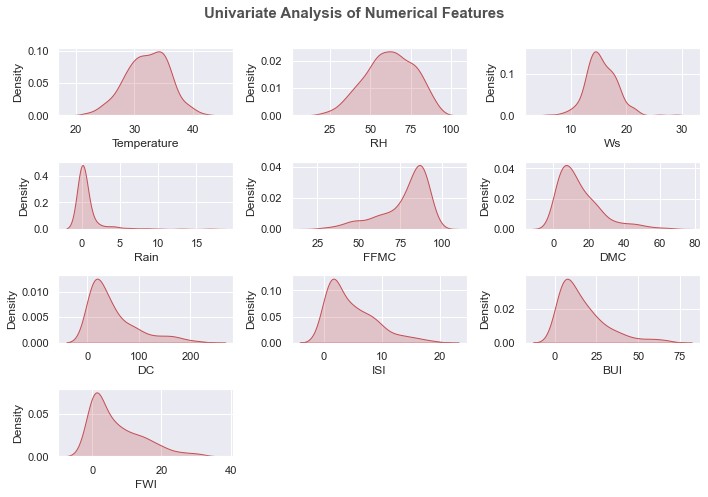

In [632]:
plt.figure(figsize = (10,8)) # Here I am setting the figure size

plt.suptitle('Univariate Analysis of Numerical Features', fontsize=15, fontweight='bold', alpha=0.8, y=1.) 
# Adding a title for all plots

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1) # 5 rows and 3 columns 
    sns.kdeplot(x=dataset[numerical_features[i]],shade=True, color='r') # I like red color :)
    plt.xlabel(numerical_features[i]) # Label is feature
    plt.tight_layout() # Handles the padding around and between the plots

- Tempature, RH, Ws Features are normally distributed
- Rain, DMC, DC, ISI, BUI, FWI features are right skewed
- FFMC feature is left skewed

### Exploring Categorical features

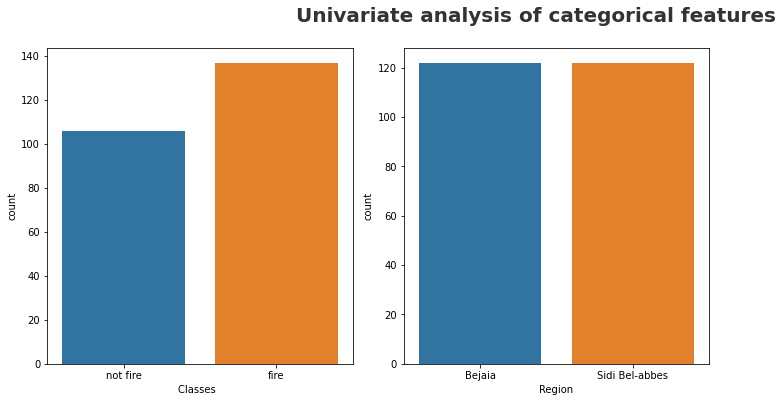

In [523]:
plt.figure(figsize=(15,25)) 
plt.suptitle('Univariate analysis of categorical features',fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(len(categorical_features)):
    plt.subplot(5,3,i+1)
    #plt.xticks(rotation=90) # With that we can rotate the x-axis labels
    sns.countplot(x=dataset[categorical_features[i]]) # We have to use countplot for categorical feature
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

In [520]:
#dataset['Classes  '] = dataset['Classes  '].str.strip()

In [521]:
#dataset['Classes  '].value_counts()

fire        137
not fire    106
Name: Classes  , dtype: int64

### Pie chart for Classes feature

<AxesSubplot:ylabel='Classes'>

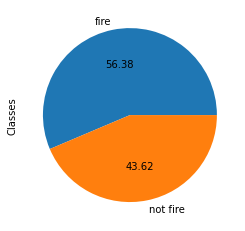

In [547]:
## interms of % we can see the category 

dataset['Classes'].value_counts().plot(kind='pie',autopct='%.2f') 

### Pie chart for Region feature

<AxesSubplot:ylabel='Region'>

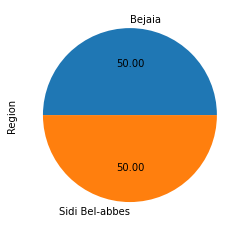

In [535]:
dataset['Region'].value_counts().plot(kind='pie',autopct='%.2f') 

## Bivariate Analysis

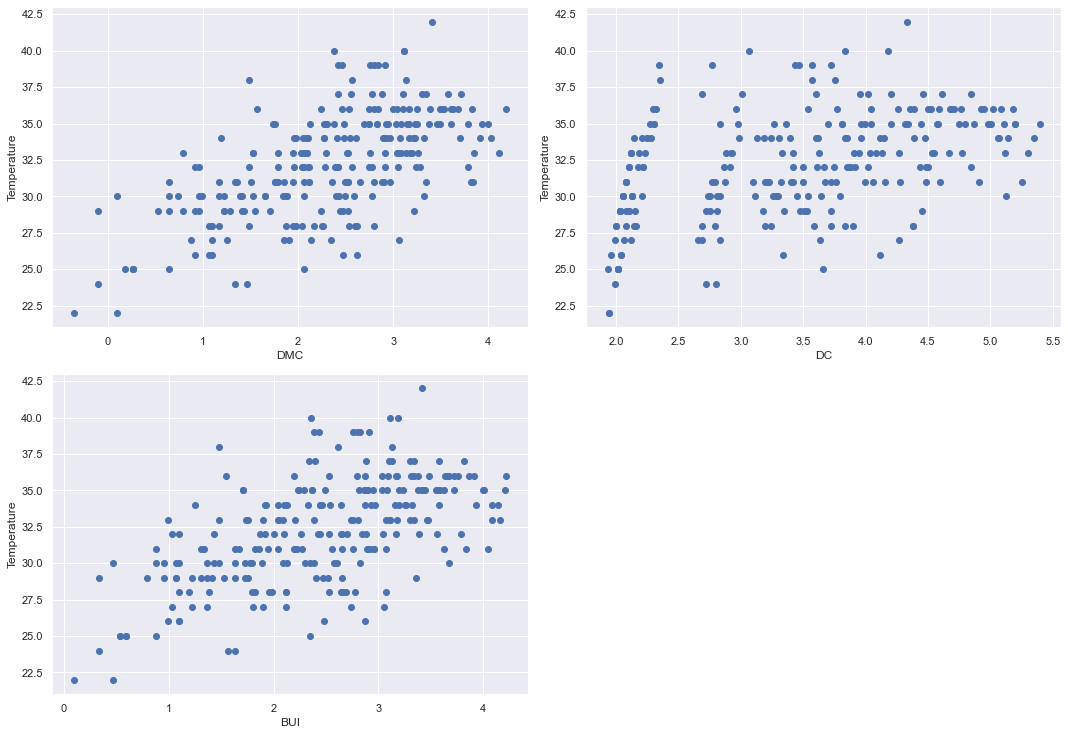

In [628]:
## We can apply logarithimic transformation for rightly skewed data and compare with temperature

sns.set(rc={'figure.figsize':(15,15)})
right_skew_features=['DMC','DC','ISI','BUI','FWI']
i=1

for feature in right_skew_features:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        plt.subplot(3,2,i)
        i+=1
        data[feature]=np.log(data[feature])
        plt.scatter(data[feature],data['Temperature'])
        plt.xlabel(feature)
        plt.ylabel('Temperature')
        plt.tight_layout()
        


## Bivariate Analysis with categorical feature

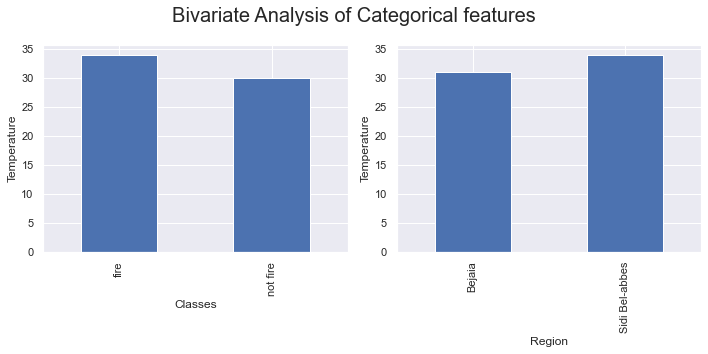

In [635]:
sns.set(rc={'figure.figsize':(10,5)})
i=1
plt.suptitle("Bivariate Analysis of Categorical features",fontsize=20)
for feature in categorical_features:
    plt.subplot(1,2,i)
    i+=1
    dataset.groupby(feature)['Temperature'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Temperature")
    plt.xticks(rotation=90)
    plt.tight_layout()

Text(0, 0.5, 'Temperature')

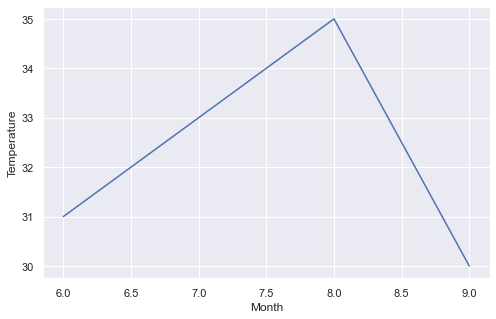

In [636]:
## Analysing the temperature with year
sns.set(rc={'figure.figsize':(8,5)})
dataset.groupby('month')['Temperature'].median().plot()
plt.xlabel('Month')
plt.ylabel('Temperature')

- We can observe that in the month August we have recorded high temperatures

### Seperate Continuous Features and Discrete Features

In [644]:
continuous_features=[feature for feature in numerical_features if dataset[feature].nunique()>25]
discrete_features=[feature for feature in numerical_features if feature not in continuous_features]

print('Continuous Features : ',continuous_features)
print('Discrete Features : ',discrete_features)

Continuous Features :  ['RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
Discrete Features :  ['Temperature', 'Ws']


## Checking Outliers

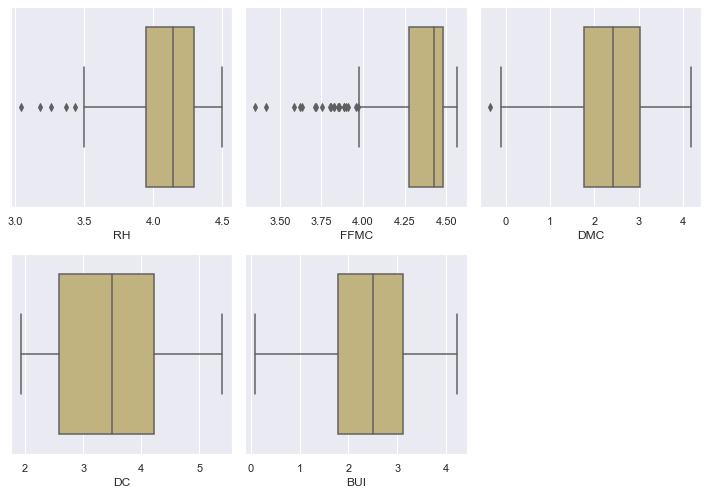

In [645]:
## Checking outliers for continous data
sns.set(rc={'figure.figsize':(10,10)})
i=1
for feature in continuous_features:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        plt.subplot(3,3,i)
        i+=1
        data[feature]=np.log(data[feature])
        sns.boxplot(x = feature,data=data,color='y')
        plt.tight_layout()

## MultiCollinearity

In [550]:
np.round(dataset.iloc[:,3:].corr()*100,2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,100.00,-65.44,-27.81,-32.68,67.75,48.31,37.05,60.76,45.55,55.84
RH,-65.44,100.00,23.61,22.30,-64.57,-40.51,-22.03,-69.06,-34.86,-57.00
Ws,-27.81,23.61,100.00,17.02,-16.33,-0.12,7.63,1.52,2.98,2.88
Rain,-32.68,22.30,17.02,100.00,-54.40,-28.85,-29.68,-34.71,-29.92,-32.27
FFMC,67.75,-64.57,-16.33,-54.40,100.00,60.24,50.39,73.97,58.97,68.60
DMC,48.31,-40.51,-0.12,-28.85,60.24,100.00,87.54,67.45,98.21,87.48
DC,37.05,-22.03,7.63,-29.68,50.39,87.54,100.00,49.89,94.19,74.02
ISI,60.76,-69.06,1.52,-34.71,73.97,67.45,49.89,100.00,63.59,90.75
BUI,45.55,-34.86,2.98,-29.92,58.97,98.21,94.19,63.59,100.00,85.78
FWI,55.84,-57.00,2.88,-32.27,68.60,87.48,74.02,90.75,85.78,100.00


<AxesSubplot:>

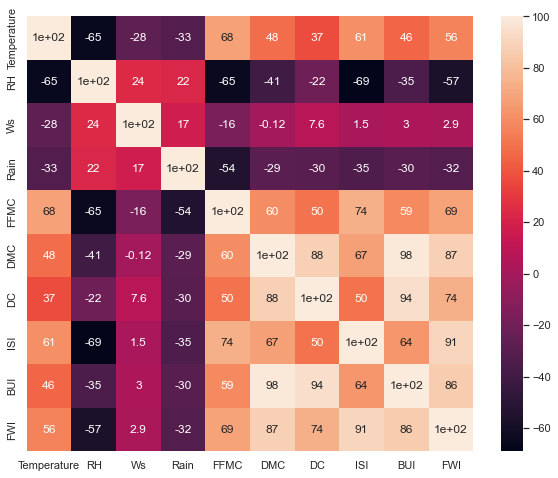

In [552]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.heatmap(np.round(dataset.iloc[:,3:].corr()*100,2),annot=True)

- There is 98% correlation between the features BUI and DMC
- And 94% correlation between BUI and DC
- By observation BUI has highly correlated with the featres DMC(98%), DC(94%), FWI(85%)
- And DMC And FWI are highly positively correlated(87%)
- FWI and ISI are highly positively correlated(90%)

- By this There is High multicollinearity between the independent features

## MODEL BUILDING

In [682]:
dataset['Region'].replace({'Bejaia':0,'Sidi Bel-abbes':1},inplace=True)

In [683]:
dataset['Classes'].replace({'not fire':0,'fire':1,'1.0':'fire'},inplace=True) # Mode is fire so 1.0 as fire

In [675]:
dataset['Classes'].fillna(1.0,inplace=True)

In [676]:
dataset['Classes'].value_counts()

fire        137
not fire    106
1.0           1
Name: Classes, dtype: int64

In [684]:
data = dataset.copy()

In [685]:
X=data.iloc[:,4:]
y=data['Temperature']

In [686]:
X

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,0
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,0
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,0
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,0
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
239,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0,1
240,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0.0,1
241,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0.0,1
242,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0.0,1


In [687]:
y

0      29
1      29
2      26
3      25
4      27
       ..
239    30
240    28
241    27
242    24
243    24
Name: Temperature, Length: 244, dtype: int64

In [688]:
from sklearn.model_selection import train_test_split

In [689]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10)

In [690]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [691]:
X_train

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
237,49,6,2.0,61.3,11.9,28.1,0.6,11.9,0.4,0.0,1
78,54,18,0.0,89.4,20.0,110.9,9.7,27.5,16.1,1.0,0
25,64,18,0.0,86.8,17.8,71.8,6.7,21.6,10.6,1.0,0
124,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0.0,1
176,64,9,1.2,73.8,11.7,15.9,1.1,11.4,0.7,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
64,69,13,0.0,85.0,8.2,19.8,4.0,8.2,3.9,1.0,0
15,89,13,0.7,36.1,1.7,7.6,0.0,2.2,0.0,0.0,0
228,51,13,0.0,88.7,16.0,50.2,6.9,17.8,9.8,1.0,1
125,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0.0,1


In [692]:
X_train=scaler.fit_transform(X_train)

In [693]:
X_test=scaler.transform(X_test)

In [694]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression

LinearRegression()

In [695]:
regression.fit(X_train,y_train)

LinearRegression()

In [696]:
print(regression.coef_)

[-1.23349039 -0.53324314 -0.25439444  0.87491349 -0.05255217  0.84927118
  0.38901988 -0.22782581 -0.36761655  0.170551    0.25669927]


In [697]:
print(regression.intercept_)

32.17791411042945


In [698]:
reg_pred=regression.predict(X_test)

In [699]:
reg_pred

array([31.74199513, 33.28642123, 33.13835005, 31.44250999, 32.86199162,
       34.68348484, 33.72966333, 34.57379048, 31.95964401, 32.87057735,
       33.73315238, 27.61182472, 35.44380643, 29.51142377, 32.05337148,
       32.13686638, 34.30825757, 28.05938126, 36.01188438, 34.27318953,
       32.71778941, 34.4780063 , 33.47774217, 32.99297035, 35.91902796,
       29.03660725, 32.53647327, 32.69240114, 27.58288684, 32.29322995,
       25.93545388, 27.37215351, 33.83963318, 31.96007755, 32.87929046,
       30.81402622, 28.9111015 , 32.83540527, 27.72324757, 35.31517892,
       32.62769454, 34.06788216, 33.95912435, 31.63134179, 36.47336722,
       33.92183886, 24.30746497, 35.1072267 , 33.87497966, 29.43753912,
       31.22283771, 32.38989041, 35.60737177, 32.10570435, 30.26329071,
       30.154825  , 33.02267795, 36.00078334, 31.42767975, 33.74050028,
       32.41779321, 32.76514381, 30.84622418, 24.32229171, 31.39849958,
       36.31078949, 29.65737899, 29.98662497, 34.98032452, 33.77

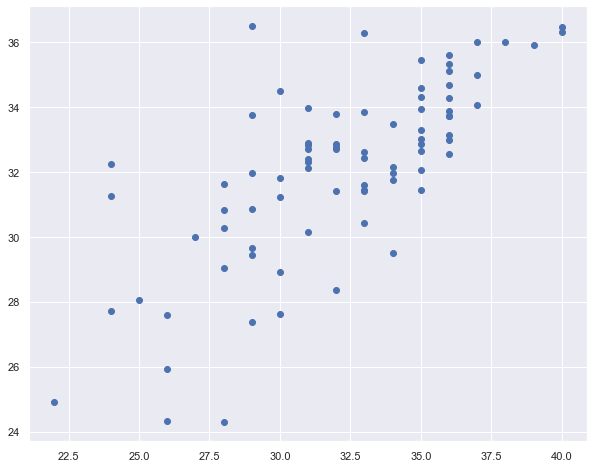

In [704]:
plt.figure(figsize=(10,8)) 
plt.scatter(y_test,reg_pred)

In [705]:
residuals=y_test-reg_pred

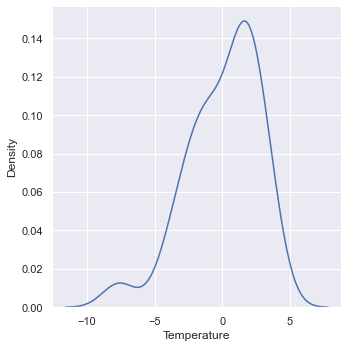

In [706]:
sns.displot(residuals,kind='kde')

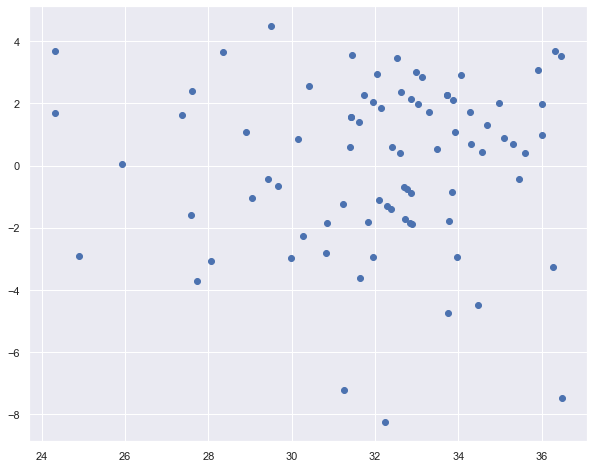

In [708]:
plt.figure(figsize=(10,8)) 
plt.scatter(reg_pred,residuals)

In [709]:
## Performance Metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


print(f"MSE = {mean_squared_error(y_test,reg_pred)}")
print(f"MSE = {mean_absolute_error(y_test,reg_pred)}")
print(f"MSE = {np.sqrt(mean_squared_error(y_test,reg_pred))}")

MSE = 7.136405112833756
MSE = 2.1854098467123415
MSE = 2.6714050821307045


## R square and adjusted R Square

In [710]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
score

0.5280901253270347

In [711]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.45285811632119966

# Ridge Regression

In [712]:
from sklearn.linear_model import Ridge

In [713]:
ridge=Ridge()

In [714]:
ridge.fit(X_train,y_train)

Ridge()

In [715]:
Ridge()

Ridge()

In [716]:
ridge_predict=ridge.predict(X_test)

In [717]:
ridge_residuals=y_test-ridge_predict

<AxesSubplot:xlabel='Temperature'>

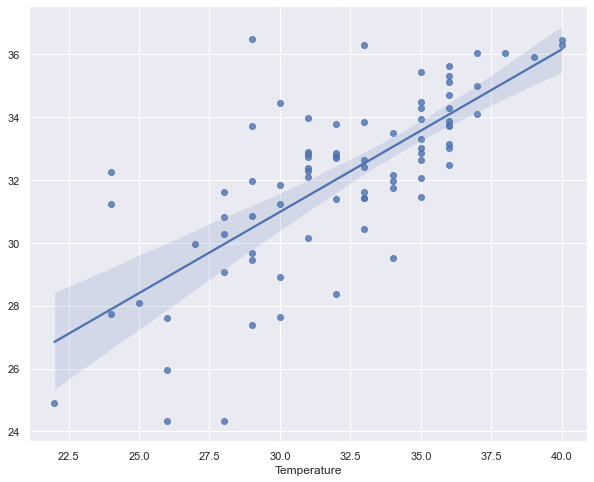

In [727]:
plt.figure(figsize=(10,8)) 
sns.regplot(x = y_test,y = ridge_predict)

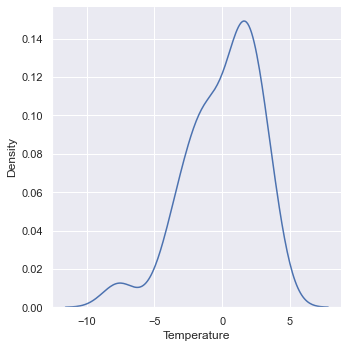

In [719]:
sns.displot(ridge_residuals,kind='kde')

In [720]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


print(f"MSE = {mean_squared_error(y_test,ridge_predict)}")
print(f"MSE = {mean_absolute_error(y_test,ridge_predict)}")
print(f"MSE = {np.sqrt(mean_squared_error(y_test,ridge_predict))}")

MSE = 7.130643937689949
MSE = 2.18530191616082
MSE = 2.67032656012143


## R square and adjusted R Square

In [721]:
from sklearn.metrics import r2_score
score=r2_score(y_test,ridge_predict)
score

0.5284710952127258

In [722]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.45329982053649376

## Lasso regression

In [728]:
from sklearn.linear_model import Lasso

In [729]:
lasso=Lasso()

In [730]:
lasso.fit(X_train,y_train)

Lasso()

In [731]:
Lasso()

Lasso()

In [732]:
las_predict=lasso.predict(X_test)

In [733]:
residuals=y_test-las_predict

<AxesSubplot:xlabel='Temperature'>

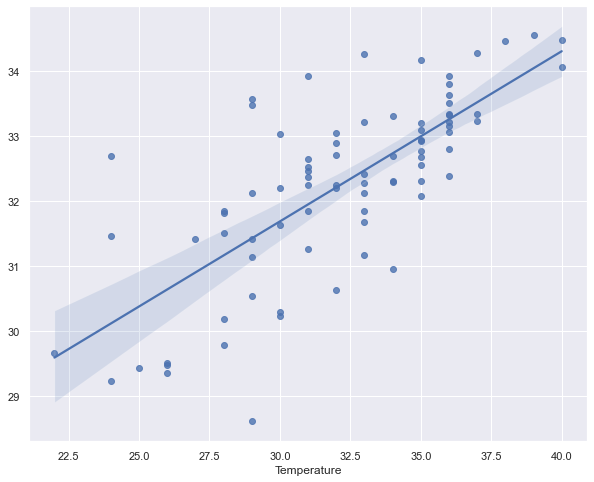

In [736]:
plt.figure(figsize=(10,8)) 
sns.regplot(x = y_test,y = las_predict)

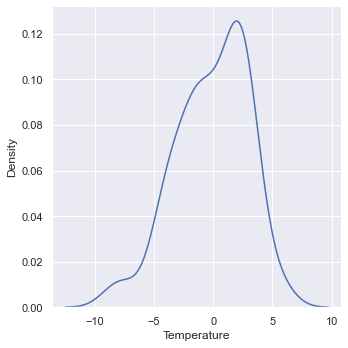

In [737]:
sns.displot(residuals,kind='kde')

In [739]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


print(f"MSE = {mean_squared_error(y_test,las_predict)}")
print(f"MSE = {mean_absolute_error(y_test,las_predict)}")
print(f"RMSE = {np.sqrt(mean_squared_error(y_test,las_predict))}")

MSE = 9.10609532182792
MSE = 2.4978660766652734
RMSE = 3.0176307464346794


## R square and adjusted R Square

In [740]:
from sklearn.metrics import r2_score
score=r2_score(y_test,las_predict)
score

0.39784019626969913

In [741]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.301843705819941

## ElasticNet

In [742]:
from sklearn.linear_model import ElasticNet

In [743]:
ElasticNet = ElasticNet()

In [744]:
ElasticNet.fit(X_train,y_train)

ElasticNet()

In [746]:
Elastic_predict=ElasticNet.predict(X_test)

In [747]:
residuals=y_test-Elastic_predict

<AxesSubplot:xlabel='Temperature'>

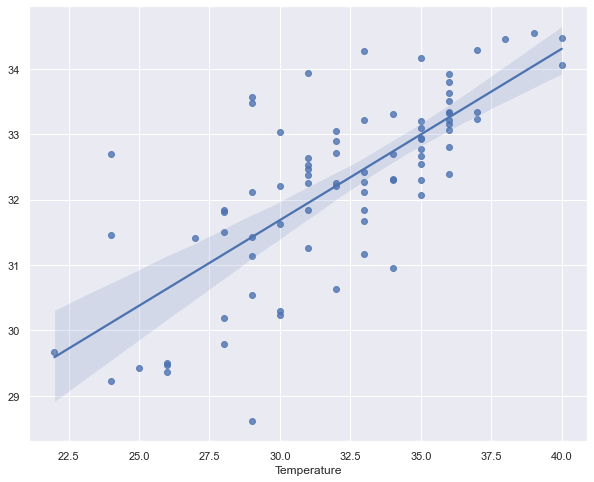

In [748]:
plt.figure(figsize=(10,8))
sns.regplot(x = y_test,y =las_predict)

<Figure size 720x576 with 0 Axes>

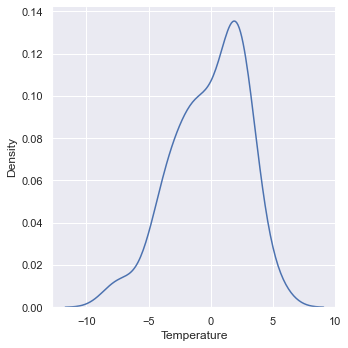

In [749]:
plt.figure(figsize=(10,8))
sns.displot(residuals,kind='kde')

In [751]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


print(f"MSE = {mean_squared_error(y_test,Elastic_predict)}")
print(f"MSE = {mean_absolute_error(y_test,Elastic_predict)}")
print(f"RMSE = {np.sqrt(mean_squared_error(y_test,Elastic_predict))}")

MSE = 8.29399490378331
MSE = 2.393588211313389
RMSE = 2.8799296699369776


In [752]:
from sklearn.metrics import r2_score
score=r2_score(y_test,Elastic_predict)
score

0.45154205321894925

In [753]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.3641067283697962